<a href="https://colab.research.google.com/github/khoa2210/KHDL/blob/main/C%C3%A2y_quy%E1%BA%BFt_%C4%91%E1%BB%8Bnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

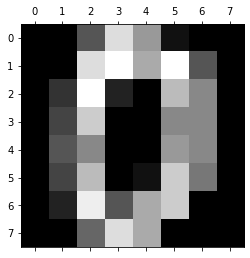

In [2]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [3]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

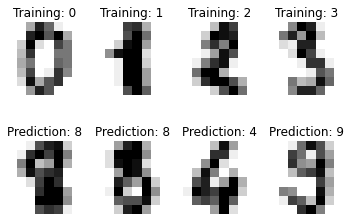

In [6]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        88
           1       0.87      0.59      0.71        91
           2       0.84      0.74      0.79        86
           3       0.65      0.76      0.70        91
           4       0.73      0.80      0.77        92
           5       0.60      0.75      0.66        91
           6       0.83      0.80      0.82        91
           7       0.88      0.69      0.77        89
           8       0.56      0.64      0.60    

Text(0.5, 0.98, 'Confusion Matrix')

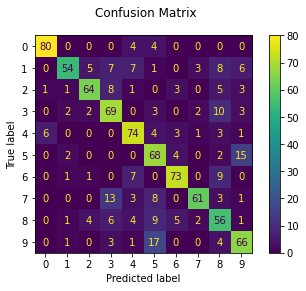

In [8]:
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")



In [10]:
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
plt.show()


Confusion matrix:
[[80  0  0  0  4  4  0  0  0  0]
 [ 0 54  5  7  7  1  0  3  8  6]
 [ 1  1 64  8  1  0  3  0  5  3]
 [ 0  2  2 69  0  3  0  2 10  3]
 [ 6  0  0  0 74  4  3  1  3  1]
 [ 0  2  0  0  0 68  4  0  2 15]
 [ 0  1  1  0  7  0 73  0  9  0]
 [ 0  0  0 13  3  8  0 61  3  1]
 [ 0  1  4  6  4  9  5  2 56  1]
 [ 0  1  0  3  1 17  0  0  4 66]]


In [11]:
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))


Accuracy of the Algorithm:  0.7397107897664071
